# 2448540 - Quantum Computing & Cryptography ETE Assignment


### Q1) Quantum Teleportation Analysis

#### 1. Theoretical Derivation
**Objective:** Determine the final state of Bob's qubit $q_2$ after the teleportation protocol.

**Initial System State:**
The system consists of three qubits: Alice's qubit $q_0$ holding the state $|\psi\rangle$ to be teleported, and an entangled pair $(q_1, q_2)$ shared between Alice and Bob.
$$ |\psi\rangle_{q0} = \alpha|0\rangle + \beta|1\rangle $$
The Bell pair (Einstein-Podolsky-Rosen pair) is in the state:
$$ |\Phi^+\rangle_{q1q2} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$

The composite state of the three qubits $|\Psi\rangle_{initial}$ is the tensor product of Alice's state and the Bell pair:
$$ |\Psi\rangle_{initial} = |\psi\rangle_{q0} \otimes |\Phi^+\rangle_{q1q2} $$
$$ |\Psi\rangle_{initial} = \frac{1}{\sqrt{2}} (\alpha|0\rangle + \beta|1\rangle) \otimes (|00\rangle + |11\rangle) $$
$$ |\Psi\rangle_{initial} = \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) $$

**Step 1: Alice applies CNOT gate (control: $q_0$, target: $q_1$)**
The CNOT flips $q_1$ if $q_0$ is $|1\rangle$.
$$ |\Psi\rangle_{1} = \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|110\rangle + \beta|101\rangle) $$

**Step 2: Alice applies Hadamard gate to $q_0$**
The Hadamard transformation maps $|0\rangle \to \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ and $|1\rangle \to \frac{|0\rangle - |1\rangle}{\sqrt{2}}$.
$$ |\Psi\rangle_{2} = \frac{1}{2} [ \alpha(|0\rangle+|1\rangle)|00\rangle + \alpha(|0\rangle+|1\rangle)|11\rangle + \beta(|0\rangle-|1\rangle)|10\rangle + \beta(|0\rangle-|1\rangle)|01\rangle ] $$

**Step 3: Regrouping terms by Alice's measurement basis ($q_0, q_1$)**
We rewrite the state to isolate Alice's possible measurement outcomes on the first two qubits ($q_0, q_1$):
$$ |\Psi\rangle_{2} = \frac{1}{2} [ |00\rangle(\alpha|0\rangle + \beta|1\rangle) + |01\rangle(\alpha|1\rangle + \beta|0\rangle) + |10\rangle(\alpha|0\rangle - \beta|1\rangle) + |11\rangle(\alpha|1\rangle - \beta|0\rangle) ] $$

**Step 4: Measurement and Conditional Correction**
Alice measures $q_0$ and $q_1$. This collapses the system into one of the four states. Bob's qubit $q_2$ is left in a state related to $|\psi\rangle$, which he corrects based on Alice's classical bits ($z$ from $q_0$, $x$ from $q_1$).

1.  **Case 00** (Probability 1/4): Bob has $\alpha|0\rangle + \beta|1\rangle$. **Action:** Identity ($I$).
2.  **Case 01** (Probability 1/4): Bob has $\alpha|1\rangle + \beta|0\rangle$. **Action:** Apply Pauli-X ($X$) gate. $X(\alpha|1\rangle + \beta|0\rangle) = \alpha|0\rangle + \beta|1\rangle$.
3.  **Case 10** (Probability 1/4): Bob has $\alpha|0\rangle - \beta|1\rangle$. **Action:** Apply Pauli-Z ($Z$) gate. $Z(\alpha|0\rangle - \beta|1\rangle) = \alpha|0\rangle + \beta|1\rangle$.
4.  **Case 11** (Probability 1/4): Bob has $\alpha|1\rangle - \beta|0\rangle$. **Action:** Apply $ZX$. $X \to \alpha|0\rangle - \beta|1\rangle$, then $Z \to \alpha|0\rangle + \beta|1\rangle$.

**Conclusion:**
Regardless of the measurement outcome, after applying the appropriate classical corrections, **the final state of Bob’s qubit $q_2$ is exactly $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.**

#### 2. The No-Cloning Theorem
The No-Cloning Theorem states that it is impossible to create an independent and identical copy of an arbitrary unknown quantum state.
In the teleportation protocol, Alice's initial qubit $q_0$ does **not** retain the state $|\psi\rangle$. When Alice measures $q_0$ and $q_1$, the superposition collapses. The information characterizing $|\psi\rangle$ ($lpha$ and $eta$) is transferred to Bob's qubit $q_2$ via the entanglement resource and classical communication.
**Therefore, $|\psi\rangle$ no longer exists on $q_0$.** The original state is destroyed at the source and reconstructed at the destination, strictly adhering to the No-Cloning Theorem.


Quantum Teleportation Circuit:


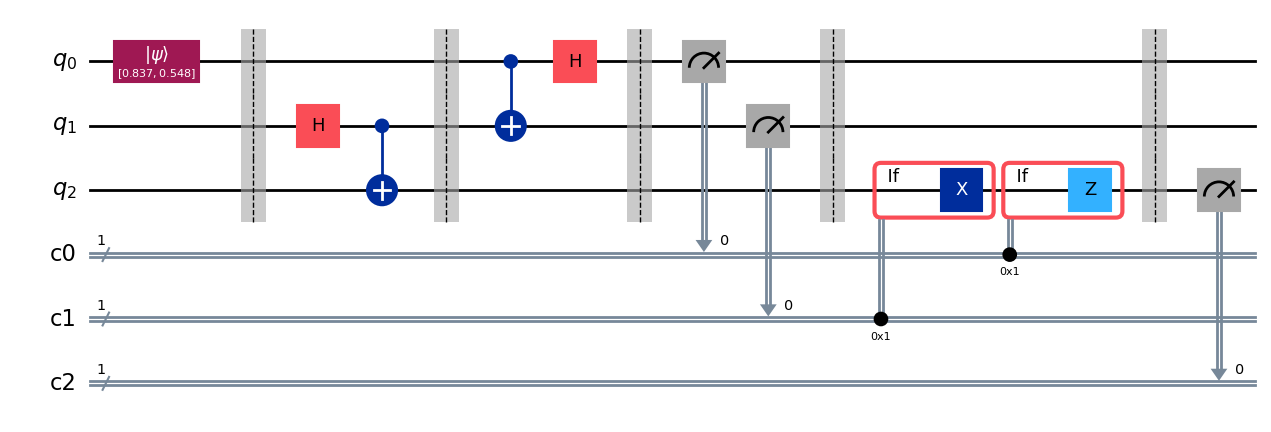


--- Verification Results ---
Expected: P(|0>) = 0.7000, P(|1>) = 0.3000
Measured: P(|0>) = 0.6971, P(|1>) = 0.3029


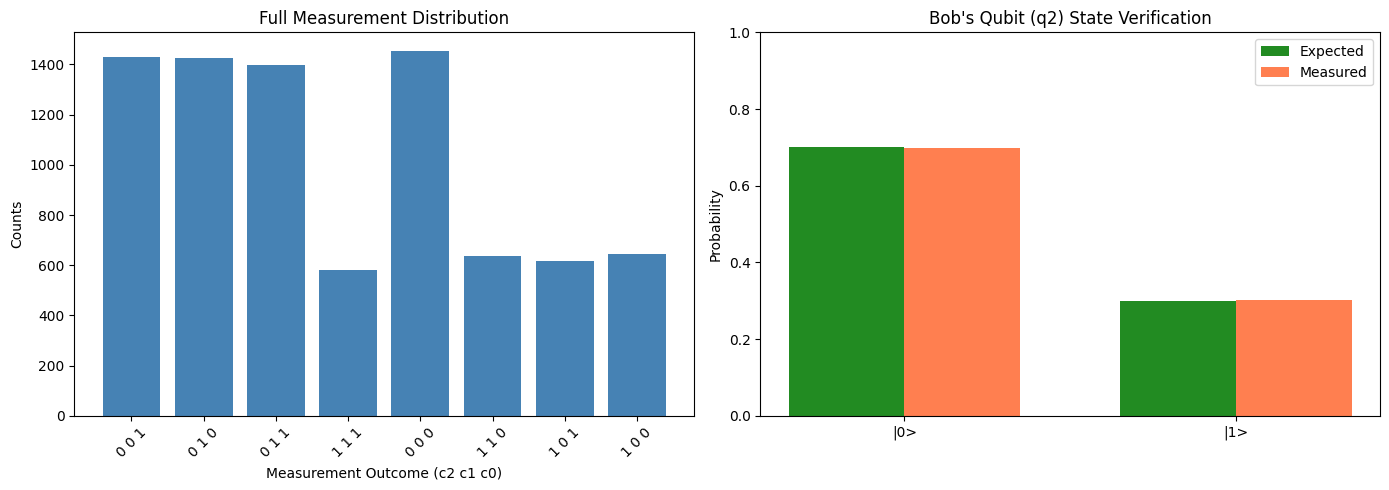


Conclusion: The measured probabilities on Bob's qubit closely match the initial state, validating the teleportation.


In [40]:
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- 1. System Initialization ---
# Create registers
q = QuantumRegister(3, name="q")    # q0 (Alice), q1 (Alice_entangled), q2 (Bob)
c0 = ClassicalRegister(1, name="c0") # Measure q0
c1 = ClassicalRegister(1, name="c1") # Measure q1
c2 = ClassicalRegister(1, name="c2") # Measure q2 (Bob's qubit for verification)
qc = QuantumCircuit(q, c0, c1, c2, name="Teleportation")

# Initialize Alice's state |psi> on q0
# alpha = sqrt(0.7), beta = sqrt(0.3) -> P(|0>) = 0.7, P(|1>) = 0.3
alpha = np.sqrt(0.7)
beta = np.sqrt(0.3)
init_state = [alpha, beta]
qc.initialize(init_state, 0)
qc.barrier()

# --- 2. Entanglement Preparation (Bell Pair on q1, q2) ---
# Create |Phi+> = 1/sqrt(2) (|00> + |11>)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# --- 3. Alice's Operations ---
# CNOT q0 -> q1
qc.cx(0, 1)
# Hadamard on q0
qc.h(0)
qc.barrier()

# --- 4. Measurement ---
# Alice measures her qubits
qc.measure(0, c0)
qc.measure(1, c1)
qc.barrier()

# --- 5. Bob's Conditional Corrections ---
# If c1 (from q1) is 1, apply X gate to q2
with qc.if_test((c1, 1)):
    qc.x(2)

# If c0 (from q0) is 1, apply Z gate to q2
with qc.if_test((c0, 1)):
    qc.z(2)

qc.barrier()

# --- 6. Verification: Measure Bob's qubit ---
qc.measure(2, c2)

# --- Visualize the Circuit ---
print("Quantum Teleportation Circuit:")
display(qc.draw('mpl'))

# --- 7. Simulation using AerSimulator (supports dynamic circuits) ---
backend = AerSimulator()
compiled_qc = transpile(qc, backend)
job = backend.run(compiled_qc, shots=8192)
result = job.result()
counts = result.get_counts()

# --- 8. Analyze Bob's Qubit (c2) ---
# The counts are in the format 'c2 c1 c0'. We sum over all values of c0 and c1.
bob_0_count = 0
bob_1_count = 0
for key, val in counts.items():
    # Key format: 'c2 c1 c0'
    bob_bit = key.split()[0]
    if bob_bit == '0':
        bob_0_count += val
    else:
        bob_1_count += val

total_shots = bob_0_count + bob_1_count
p0_measured = bob_0_count / total_shots
p1_measured = bob_1_count / total_shots

print(f"\n--- Verification Results ---")
print(f"Expected: P(|0>) = {alpha**2:.4f}, P(|1>) = {beta**2:.4f}")
print(f"Measured: P(|0>) = {p0_measured:.4f}, P(|1>) = {p1_measured:.4f}")

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Full shot distribution
ax[0].bar(counts.keys(), counts.values(), color='steelblue')
ax[0].set_xlabel('Measurement Outcome (c2 c1 c0)')
ax[0].set_ylabel('Counts')
ax[0].set_title('Full Measurement Distribution')
ax[0].tick_params(axis='x', rotation=45)

# Bob's qubit distribution
labels = ['|0>', '|1>']
measured_probs = [p0_measured, p1_measured]
expected_probs = [alpha**2, beta**2]
x_pos = np.arange(len(labels))
width = 0.35
ax[1].bar(x_pos - width/2, expected_probs, width, label='Expected', color='forestgreen')
ax[1].bar(x_pos + width/2, measured_probs, width, label='Measured', color='coral')
ax[1].set_ylabel('Probability')
ax[1].set_title("Bob's Qubit (q2) State Verification")
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\nConclusion: The measured probabilities on Bob's qubit closely match the initial state, validating the teleportation.")



### Q2) Diffie-Hellman Man-in-the-Middle (MitM) Simulation

#### Context
Standard Diffie-Hellman Key Exchange relies on the difficulty of the Discrete Logarithm Problem. However, it does not inherently authenticate the participants. This vulnerability allows a Man-in-the-Middle (Mallory) to intercept communications, masquerade as Bob to Alice, and as Alice to Bob, effectively establishing two separate encrypted channels while the victims believe they share a single secure channel.

#### Attack Flow
1. **Network Setup**: Public parameters $g$ (base) and $p$ (modulus) are established.
2. **Key Generation**: Alice and Bob generate private keys ($a, b$) and public keys ($A, B$).
3. **Interception**: Mallory intercepts $A$ and $B$.
4. **Injection**: Mallory generates her own private key $m=10$ and public key $M = g^m \pmod p$. She sends $M$ to Alice (pretending to be Bob) and $M$ to Bob (pretending to be Alice).
5. **Secret Calculation**:
   - Alice computes secret using $M$: $S_A = M^a \pmod p$.
   - Bob computes secret using $M$: $S_B = M^b \pmod p$.
   - Mallory computes keys for both sides: $S_{MA} = A^m \pmod p$ and $S_{MB} = B^m \pmod p$.



In [41]:
import random

def power(a, b, m):
    """Modular exponentiation: (a^b) % m"""
    res = 1
    a = a % m
    while b > 0:
        if b % 2 == 1:
            res = (res * a) % m
        a = (a * a) % m
        b //= 2
    return res

# --- 1. Setup Public Parameters ---
p = 997  # A prime number
g = 2    # A primitive root modulo p
print(f"Network Parameters:\n Prime (p): {p}\n Generator (g): {g}")
print("-" * 50)

# --- 2. Honest Participants Generate Keys ---
# Alice
alice_private = random.randint(1, p-1)
alice_public = power(g, alice_private, p)
print(f"Alice: Private Key (a) = {alice_private}, Public Key (A) = {alice_public}")

# Bob
bob_private = random.randint(1, p-1)
bob_public = power(g, bob_private, p)
print(f"Bob:   Private Key (b) = {bob_private}, Public Key (B) = {bob_public}")
print("-" * 50)

# --- 3. Mallory's Attack ---
print(">>> Mallory Intercepts Public Keys A and B <<<")

# Mallory's Keys
mallory_private = 10
# Mallory calculates her public key M
mallory_public = power(g, mallory_private, p)
print(f"Mallory: Private Key (m) = {mallory_private}, Public Key (M) = {mallory_public}")

print("\n>>> Mallory sends M to Alice (pretending to be Bob) <<<")
print(">>> Mallory sends M to Bob (pretending to be Alice) <<<")
print("-" * 50)

# --- 4. Secret Key Calculation ---

# Alice calculates secret (thinking she received M from Bob)
# S_Alice = M^a mod p
alice_shared_secret = power(mallory_public, alice_private, p)

# Bob calculates secret (thinking he received M from Alice)
# S_Bob = M^b mod p
bob_shared_secret = power(mallory_public, bob_private, p)

# Mallory calculates shared secrets with both
# S_Mal_Alice = A^m mod p
mallory_secret_alice = power(alice_public, mallory_private, p)

# S_Mal_Bob = B^m mod p
mallory_secret_bob = power(bob_public, mallory_private, p)

# --- 5. Results & Verification ---
print("Calculated Shared Secrets:")
print(f"Alice's Secret (S_A):        {alice_shared_secret}")
print(f"Mallory's Secret w/ Alice:   {mallory_secret_alice}")
print(f"Bob's Secret (S_B):          {bob_shared_secret}")
print(f"Mallory's Secret w/ Bob:     {mallory_secret_bob}")
print("-" * 50)

# Verification Logic
if alice_shared_secret == mallory_secret_alice:
    print("[CRITICAL] Mallory can decrypt Alice's messages.")
else:
    print("[INFO] Mallory failed to compromise Alice.")

if bob_shared_secret == mallory_secret_bob:
    print("[CRITICAL] Mallory can decrypt Bob's messages.")
else:
    print("[INFO] Mallory failed to compromise Bob.")

if alice_shared_secret != bob_shared_secret:
    print("[SUCCESS] Attack Successful: Alice and Bob do NOT share the same key.")
else:
    print("[FAIL] Alice and Bob somehow reached the same key.")



Network Parameters:
 Prime (p): 997
 Generator (g): 2
--------------------------------------------------
Alice: Private Key (a) = 843, Public Key (A) = 781
Bob:   Private Key (b) = 560, Public Key (B) = 9
--------------------------------------------------
>>> Mallory Intercepts Public Keys A and B <<<
Mallory: Private Key (m) = 10, Public Key (M) = 27

>>> Mallory sends M to Alice (pretending to be Bob) <<<
>>> Mallory sends M to Bob (pretending to be Alice) <<<
--------------------------------------------------
Calculated Shared Secrets:
Alice's Secret (S_A):        199
Mallory's Secret w/ Alice:   199
Bob's Secret (S_B):          229
Mallory's Secret w/ Bob:     229
--------------------------------------------------
[CRITICAL] Mallory can decrypt Alice's messages.
[CRITICAL] Mallory can decrypt Bob's messages.
[SUCCESS] Attack Successful: Alice and Bob do NOT share the same key.


### Analysis of the Attack

**Why Standard Diffie-Hellman Failed:**
The Standard Diffie-Hellman protocol is secure against passive eavesdropping (sniffing) because solving the Discrete Logarithm Problem ($g^x \pmod p \to x$) is computationally infeasible for large numbers. However, the protocol **lacks identity authentication**.

**Specific Missing Security Property:**
The failure stems from the lack of **integrity** and **origin authentication** for the public keys.
1.  **No Signatures:** Alice has no way to verify that the public key she received ($M$) actually belongs to Bob. It is just a number.
2.  **No Certificates:** There is no trusted third party (Certificate Authority) or Public Key Infrastructure (PKI) to validate the mapping between the identity "Bob" and the public key.

Because the protocol blindly accepts public keys, Mallory can inject her own parameters ($M$) into the stream. Alice mathematically combines her private key with Mallory's public key, creating a link that Mallory controls, rather than a link with Bob. Secure implementations of Diffie-Hellman must be authenticated (e.g., Station-to-Station protocol) using digital signatures or digital certificates.

